## Instalasi package yang diperlukan

<center><a href=\"https://www.nvidia.com/dli\"> <img src="Pelatihan-DLI.jpeg" alt=\"Header\" style=\"width: 1000px;\"/> </a></center>

# Pelatihan Dasar Pemrograman Python untuk TNI
#Notebook ini merupakan bagian dari pelatihan **Dasar Pemrograman Python** untuk peserta TNI
### 🎯 Tujuan Pembelajaran,
- Mengenal dasar data preparation 
- Memahami cara akusisi data dari sumber eksternal
- Melakukan Eksplorasi Analisis Data
- Melakukan Eksplorasi Visualisasi Data
- Menangani Anomali  / Data Kosonng
- Menangani imbalance pada Data

# Studi Kasus : Data Preparation dalam dataset Transaksi Kartu Kredit
Penipuan kartu kredit adalah penggunaan kartu kredit milik orang lain tanpa izin untuk melakukan transaksi tertentu. Perusahaan kartu kredit butuh mengenali transaksi kartu kredit palsu agar nasabah tidak dikenakan biaya untuk barang yang tidak mereka beli. Dataset yang digunakan dalam proyek ini berisi transaksi yang dilakukan dengan kartu kredit pada bulan September 2013 oleh pemegang kartu. Dataset tersebut menyajikan transaksi yang terjadi dalam dua hari, dengan 492 penipuan dari 284.807 transaksi. Dataset ini sangat tidak seimbang, dengan kelas positif (penipuan) menyumbang 0,172% dari seluruh transaksi.

In [ ]:

!pip install  mysql-connector-python  pandas numpy sqlalchemy seaborn matplotlib StandardScaler imblearn

## Import library

In [65]:
import os
import glob
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

### Akusisi Data dengan Exztract-Transform-Load Sederhana

#### Mengumpulkan Data dari Database

In [66]:
#Inisiasi Koneksi Database
db = mysql.connector.connect(
    host="153.92.15.41",       # Nama host database (bisa juga IP)
    user="u905167207_transaction",            # Username MySQL
    password="Akmil2025!", # Password MySQL
    database="u905167207_transaction"   # Nama database yang ingin digunakan
)

# Memperoleh Data Transaksi
cursor = db.cursor()
cursor.execute("SELECT * FROM transaction")

# Ambil nama kolom / field yang tersedia
columns = [col[0] for col in cursor.description]
# Ambil data
rows = cursor.fetchall()
# Buat DataFrame
data = pd.DataFrame(rows, columns=columns)
data.head()

,Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,Amount,Class
0,30091,1.234700,0.101426,0.396596,0.562335,-0.559848,-1.01974,0.026248,-0.188019,0.172985,...,-0.082703,-0.282305,0.012368,0.412432,0.338168,0.392032,-0.047143,0.014937,19.99,0
1,30091,-0.620329,0.592275,1.549230,1.187470,0.581735,0.46745,0.331921,0.300166,-0.597210,...,0.034725,0.180147,-0.215229,-0.301361,0.125020,-0.186171,0.129327,0.101283,15.79,0
2,30092,-0.145901,-2.458870,0.335930,0.214489,-1.649660,0.24610,0.116117,0.075827,1.171450,...,0.627608,0.573614,-0.661406,0.299495,0.223315,-0.491422,-0.024602,0.136928,661.66,0
3,30092,1.153190,-0.519181,-0.081714,-0.435249,-0.799677,-1.06841,-0.177028,-0.168790,-0.997402,...,-0.235848,-1.042570,0.182977,0.273739,0.033128,-0.640265,-0.000798,0.056655,111.00,0
4,30094,1.323490,-0.390540,0.063111,-0.362268,-0.888375,-1.06528,-0.398621,-0.220413,-0.666501,...,-0.057438,-0.206004,-0.043587,0.332390,0.472670,-0.305957,0.017238,0.044551,45.87,0


### Mengumpulkan Data dari API

In [67]:
# Endpoint API untuk semua negara
url = "https://liat2.info/transaction"

# Kirim permintaan GET
response = requests.get(url)
# Ubah hasil ke JSON
json_transaksi = response.json()
data_transaksi = pd.json_normalize(json_transaksi['data'])


### Integrasi Data

In [68]:
#data_transaksi.head()
data = data._append(data_transaksi)


### Eksplorasi dan Analisis Data

In [69]:
# Ikhtisar Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275349 entries, 0 to 138797
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    275349 non-null  int64  
 1   v1      275349 non-null  float64
 2   v2      275349 non-null  float64
 3   v3      275349 non-null  float64
 4   v4      275349 non-null  float64
 5   v5      275349 non-null  float64
 6   v6      275349 non-null  float64
 7   v7      275349 non-null  float64
 8   v8      275349 non-null  float64
 9   v9      275349 non-null  float64
 10  v10     275349 non-null  float64
 11  v11     275349 non-null  float64
 12  v12     275349 non-null  float64
 13  v13     275349 non-null  float64
 14  v14     275349 non-null  float64
 15  v15     275349 non-null  float64
 16  v16     275349 non-null  float64
 17  v17     275349 non-null  float64
 18  v18     275349 non-null  float64
 19  v19     275349 non-null  float64
 20  v20     275349 non-null  float64
 21  v21     275349 

In [70]:
# INformasi Statisitk dari dataset
data.describe()

,Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,Amount,Class
count,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,...,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000,275349.000000
mean,97882.627473,0.009131,-0.009804,-0.031236,-0.008534,0.001380,-0.004327,0.001901,0.002541,-0.026577,...,0.001824,0.005506,0.001137,-0.000866,-0.003042,-0.002979,-0.000280,-0.000093,89.206334,0.001656
std,45259.720185,1.971203,1.660716,1.518064,1.414123,1.386248,1.332739,1.242096,1.191172,1.086686,...,0.726605,0.727945,0.628432,0.606013,0.523823,0.479421,0.403121,0.331926,251.987793,0.040661
min,1.000000,-56.407500,-72.715700,-48.325600,-5.683170,-113.743000,-26.160500,-43.557200,-73.216700,-13.434100,...,-34.830400,-10.933100,-44.807700,-2.836630,-10.295400,-2.604550,-22.565700,-15.430100,0.000000,0.000000
25%,57465.000000,-0.915972,-0.609929,-0.927129,-0.853745,-0.694011,-0.772829,-0.555884,-0.209057,-0.659769,...,-0.226225,-0.541723,-0.161261,-0.355211,-0.321323,-0.326789,-0.070607,-0.053516,5.690000,0.000000
50%,88152.000000,0.029712,0.057349,0.148014,-0.030662,-0.050664,-0.278509,0.042848,0.022997,-0.070096,...,-0.025161,0.013503,-0.009714,0.040003,0.010774,-0.054810,0.001439,0.010921,22.370000,0.000000
75%,140300.000000,1.335970,0.799015,0.999489,0.728708,0.620041,0.394708,0.573658,0.328832,0.563432,...,0.190804,0.539321,0.150156,0.441050,0.350104,0.235066,0.090130,0.078264,78.310000,0.000000
max,172792.000000,2.454930,22.057700,9.382560,16.875300,34.801700,73.301600,120.589000,20.007200,15.595000,...,27.202800,10.503100,22.528400,4.584550,7.519590,3.415640,31.612200,33.847800,25691.200000,1.000000


In [59]:
# Pemeriksaan nilai kosong
data.isnull().sum()

Time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
Amount    0
Class     0
dtype: int64

In [71]:
# Menampilkan distribusi kelas
data['Class'].value_counts()
(data.groupby('Class')['Class'].count()/data['Class'].count()) * 100

Class
0    99.834392
1     0.165608
Name: Class, dtype: float64

In [72]:
#Informasi Tipe data dari setiap fitur / kolom
data.dtypes

Time        int64
v1        float64
v2        float64
v3        float64
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22       float64
v23       float64
v24       float64
v25       float64
v26       float64
v27       float64
v28       float64
Amount    float64
Class       int64
dtype: object

# Visualisasi Data

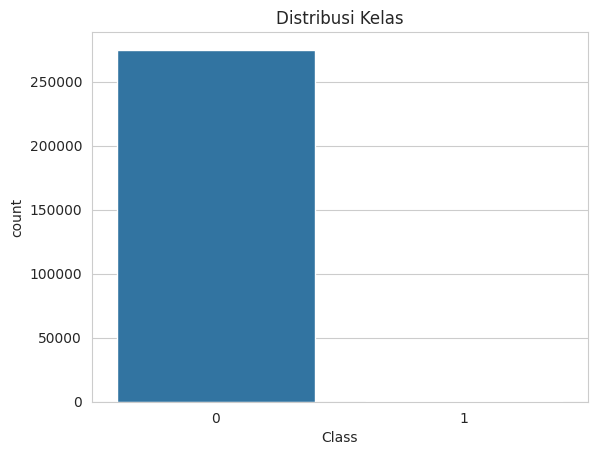

In [75]:

# Visualisasi Distribusi Kelas
sns.countplot(x='Class', data=data)
plt.title('Distribusi Kelas')
plt.show()

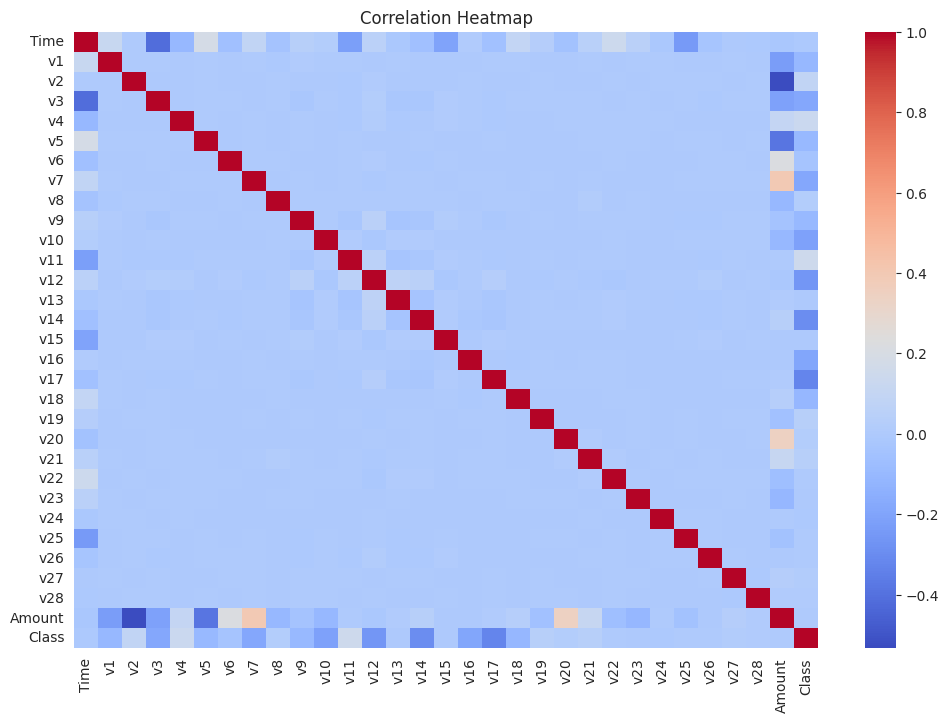

In [76]:
# Visualisasi Korelasi dengan Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

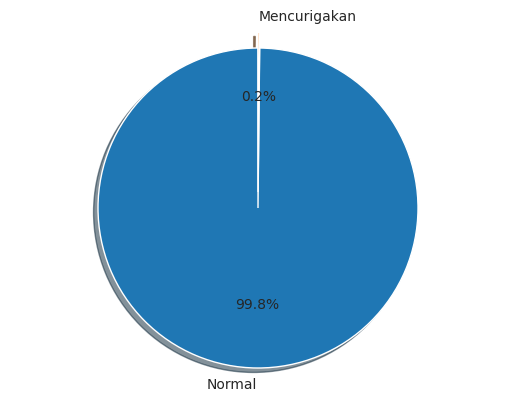

In [80]:
# Distribusi dalam pie chart
classes = data['Class'].value_counts()
normal_share = classes[0] / data['Class'].count() * 100
fraud_share = classes[1] / data['Class'].count() * 100

labels = 'Normal', 'Mencurigakan'
sizes = [normal_share, fraud_share]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Identifikasi Imbalance (Ketidasetimbangan) Data

### Identifikasi Persentase Ketidaksetimbangan

In [82]:

print('The percentage without churn prediction is ', round(data['Class'].value_counts()[0]/len(data) * 100, 2), '% of the dataset')
print('The percentage with churn prediction is ', round(data['Class'].value_counts()[1]/len(data) * 100, 2), '% of the dataset')
print('The ratio of imbalance is', round(data['Class'].value_counts()[1]/data['Class'].value_counts()[0] * 100, 2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


### Visualisasi perbandingan Fitur 'Time' dan 'Class' Target

/tmp/ipykernel_1136357/2398696602.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data['Time'], y=data['Class'], palette=cmap, data=data)


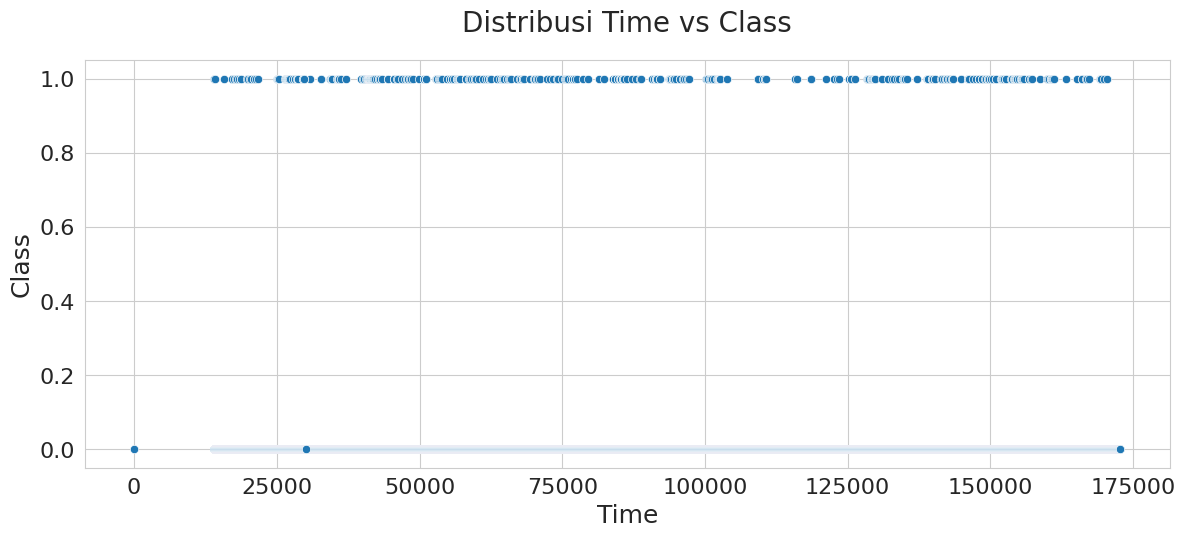

In [83]:

Delta_Time = pd.to_timedelta(data['Time'], unit='s')
data['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
data['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
data['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

plt.subplot(3, 1, 1)
sns.scatterplot(x=data['Time'], y=data['Class'], palette=cmap, data=data)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.title('Distribusi Time vs Class', size=20, y=1.05)
plt.show()

### Visualisasi Transaksi Normal dan Mencurigakan Per Hari

/tmp/ipykernel_1136357/521783026.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 0]["Time_Day"], color='green')
/tmp/ipykernel_1136357/521783026.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 1]["Time_Day"], color='red')


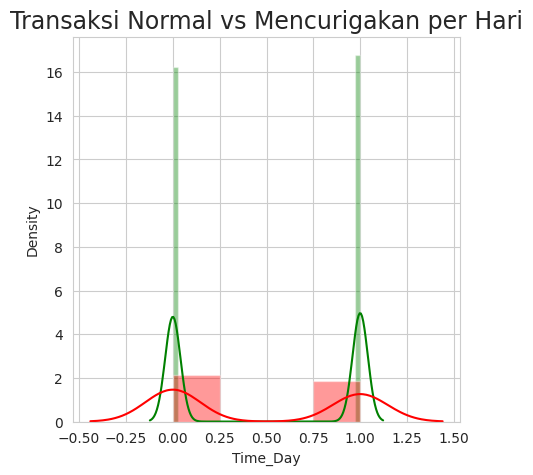

In [85]:

plt.figure(figsize=(5, 5))
sns.distplot(data[data['Class'] == 0]["Time_Day"], color='green')
sns.distplot(data[data['Class'] == 1]["Time_Day"], color='red')
plt.title('Transaksi Normal vs Mencurigakan per Hari', fontsize=17)
plt.show()

### Visualisasi Transaksi Normal dan Palsu Per Jam

/tmp/ipykernel_1136357/3618822944.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 0]["Time_Hour"], color='green')
/tmp/ipykernel_1136357/3618822944.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 1]["Time_Hour"], color='red')


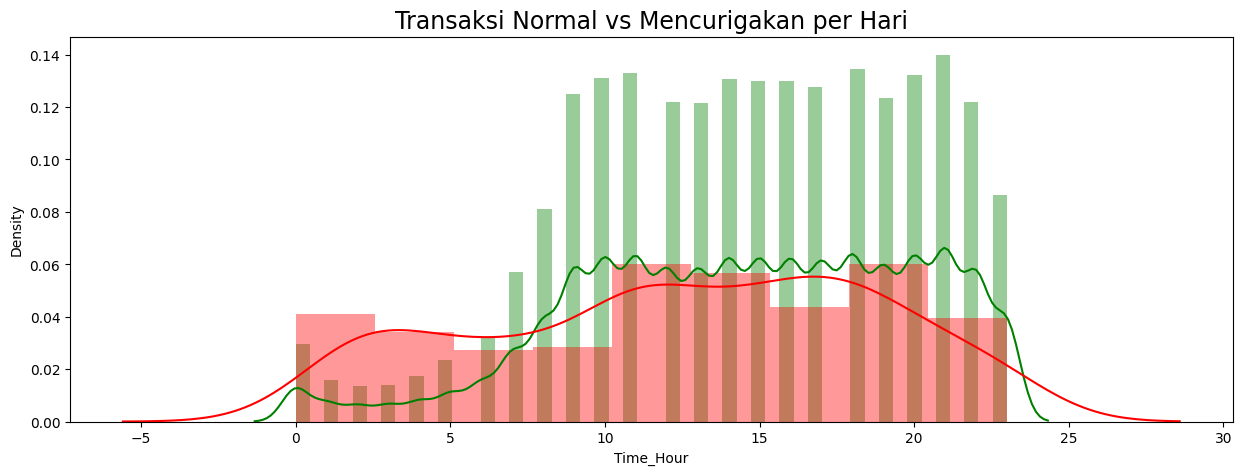

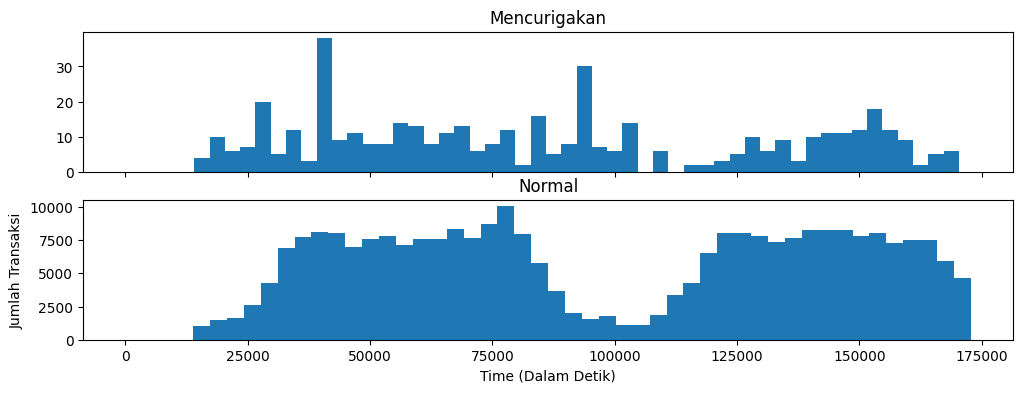

In [43]:
plt.figure(figsize=(15, 5))
sns.distplot(data[data['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(data[data['Class'] == 1]["Time_Hour"], color='red')
plt.title('Transaksi Normal vs Mencurigakan per Hari', fontsize=17)
plt.show()

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))
bins = 50

ax1.hist(data.Time[data.Class == 1], bins=bins)
ax1.set_title('Mencurigakan')

ax2.hist(data.Time[data.Class == 0], bins=bins)
ax2.set_title('Normal')

plt.xlabel('Time (Dalam Detik)')
plt.ylabel('Jumlah Transaksi')
plt.show()

Distribusi transaksi penipuan dan non-penipuan per jam menunjukkan bahwa penipuan lebih lazim terjadi pada jam-jam tertentu dalam sehari.

### Visualisasi Perbandingan Jumlah dengan kelas target

In [86]:

df_Fraud = data[data['Class'] == 1]
df_Regular = data[data['Class'] == 0]

In [87]:
# Statistik jumlah transaksi palsu
print(df_Fraud['Amount'].describe())

count     456.000000
mean      125.553092
std       251.855730
min         0.000000
25%         1.000000
50%        15.470000
75%       109.307500
max      2125.870000
Name: Amount, dtype: float64


In [46]:
# Statistik jumlah transaksi normal
print(df_Regular["Amount"].describe())

count    274893.000000
mean         89.146041
std         251.984114
min           0.000000
25%           5.730000
50%          22.390000
75%          78.180000
max       25691.200000
Name: Amount, dtype: float64


/tmp/ipykernel_1136357/1808926421.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data['Amount'], y='Class', palette=cmap, data=data)


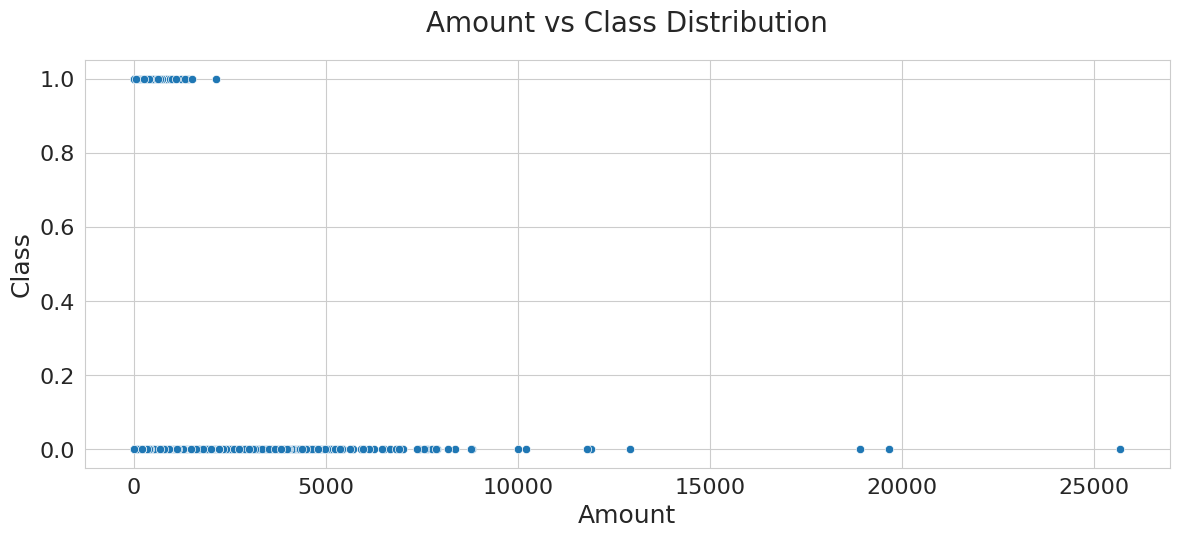

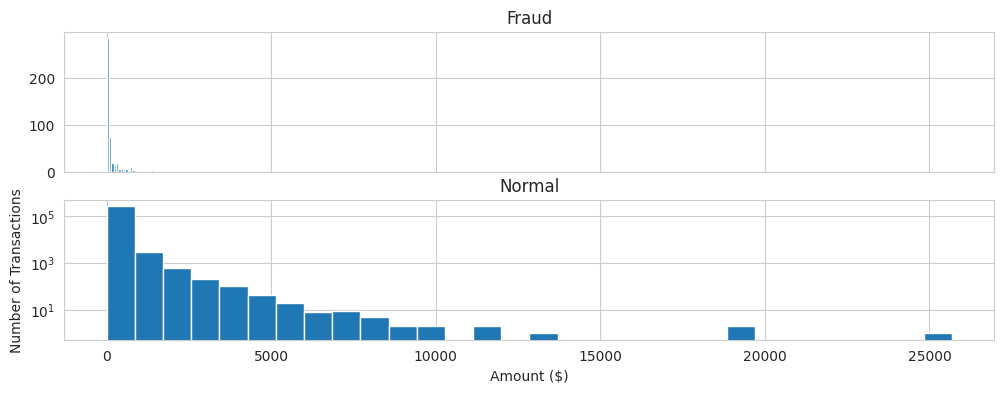

In [88]:
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

plt.subplot(3, 1, 1)
sns.scatterplot(x=data['Amount'], y='Class', palette=cmap, data=data)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.title('Amount vs Class Distribution', size=20, y=1.05)

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))
bins = 30

ax1.hist(data.Amount[data.Class == 1], bins=bins)
ax1.set_title('Fraud')

ax2.hist(data.Amount[data.Class == 0], bins=bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


Transaksi penipuan cenderung memiliki jumlah rata-rata yang lebih tinggi dibandingkan dengan transaksi non-penipuan. Diagram sebar dan histogram menunjukkan bahwa meskipun penipuan dapat terjadi pada berbagai jumlah transaksi, terdapat konsentrasi jumlah yang lebih tinggi yang signifikan di antara transaksi penipuan.

### Visualisasi distribusi atribut numerik

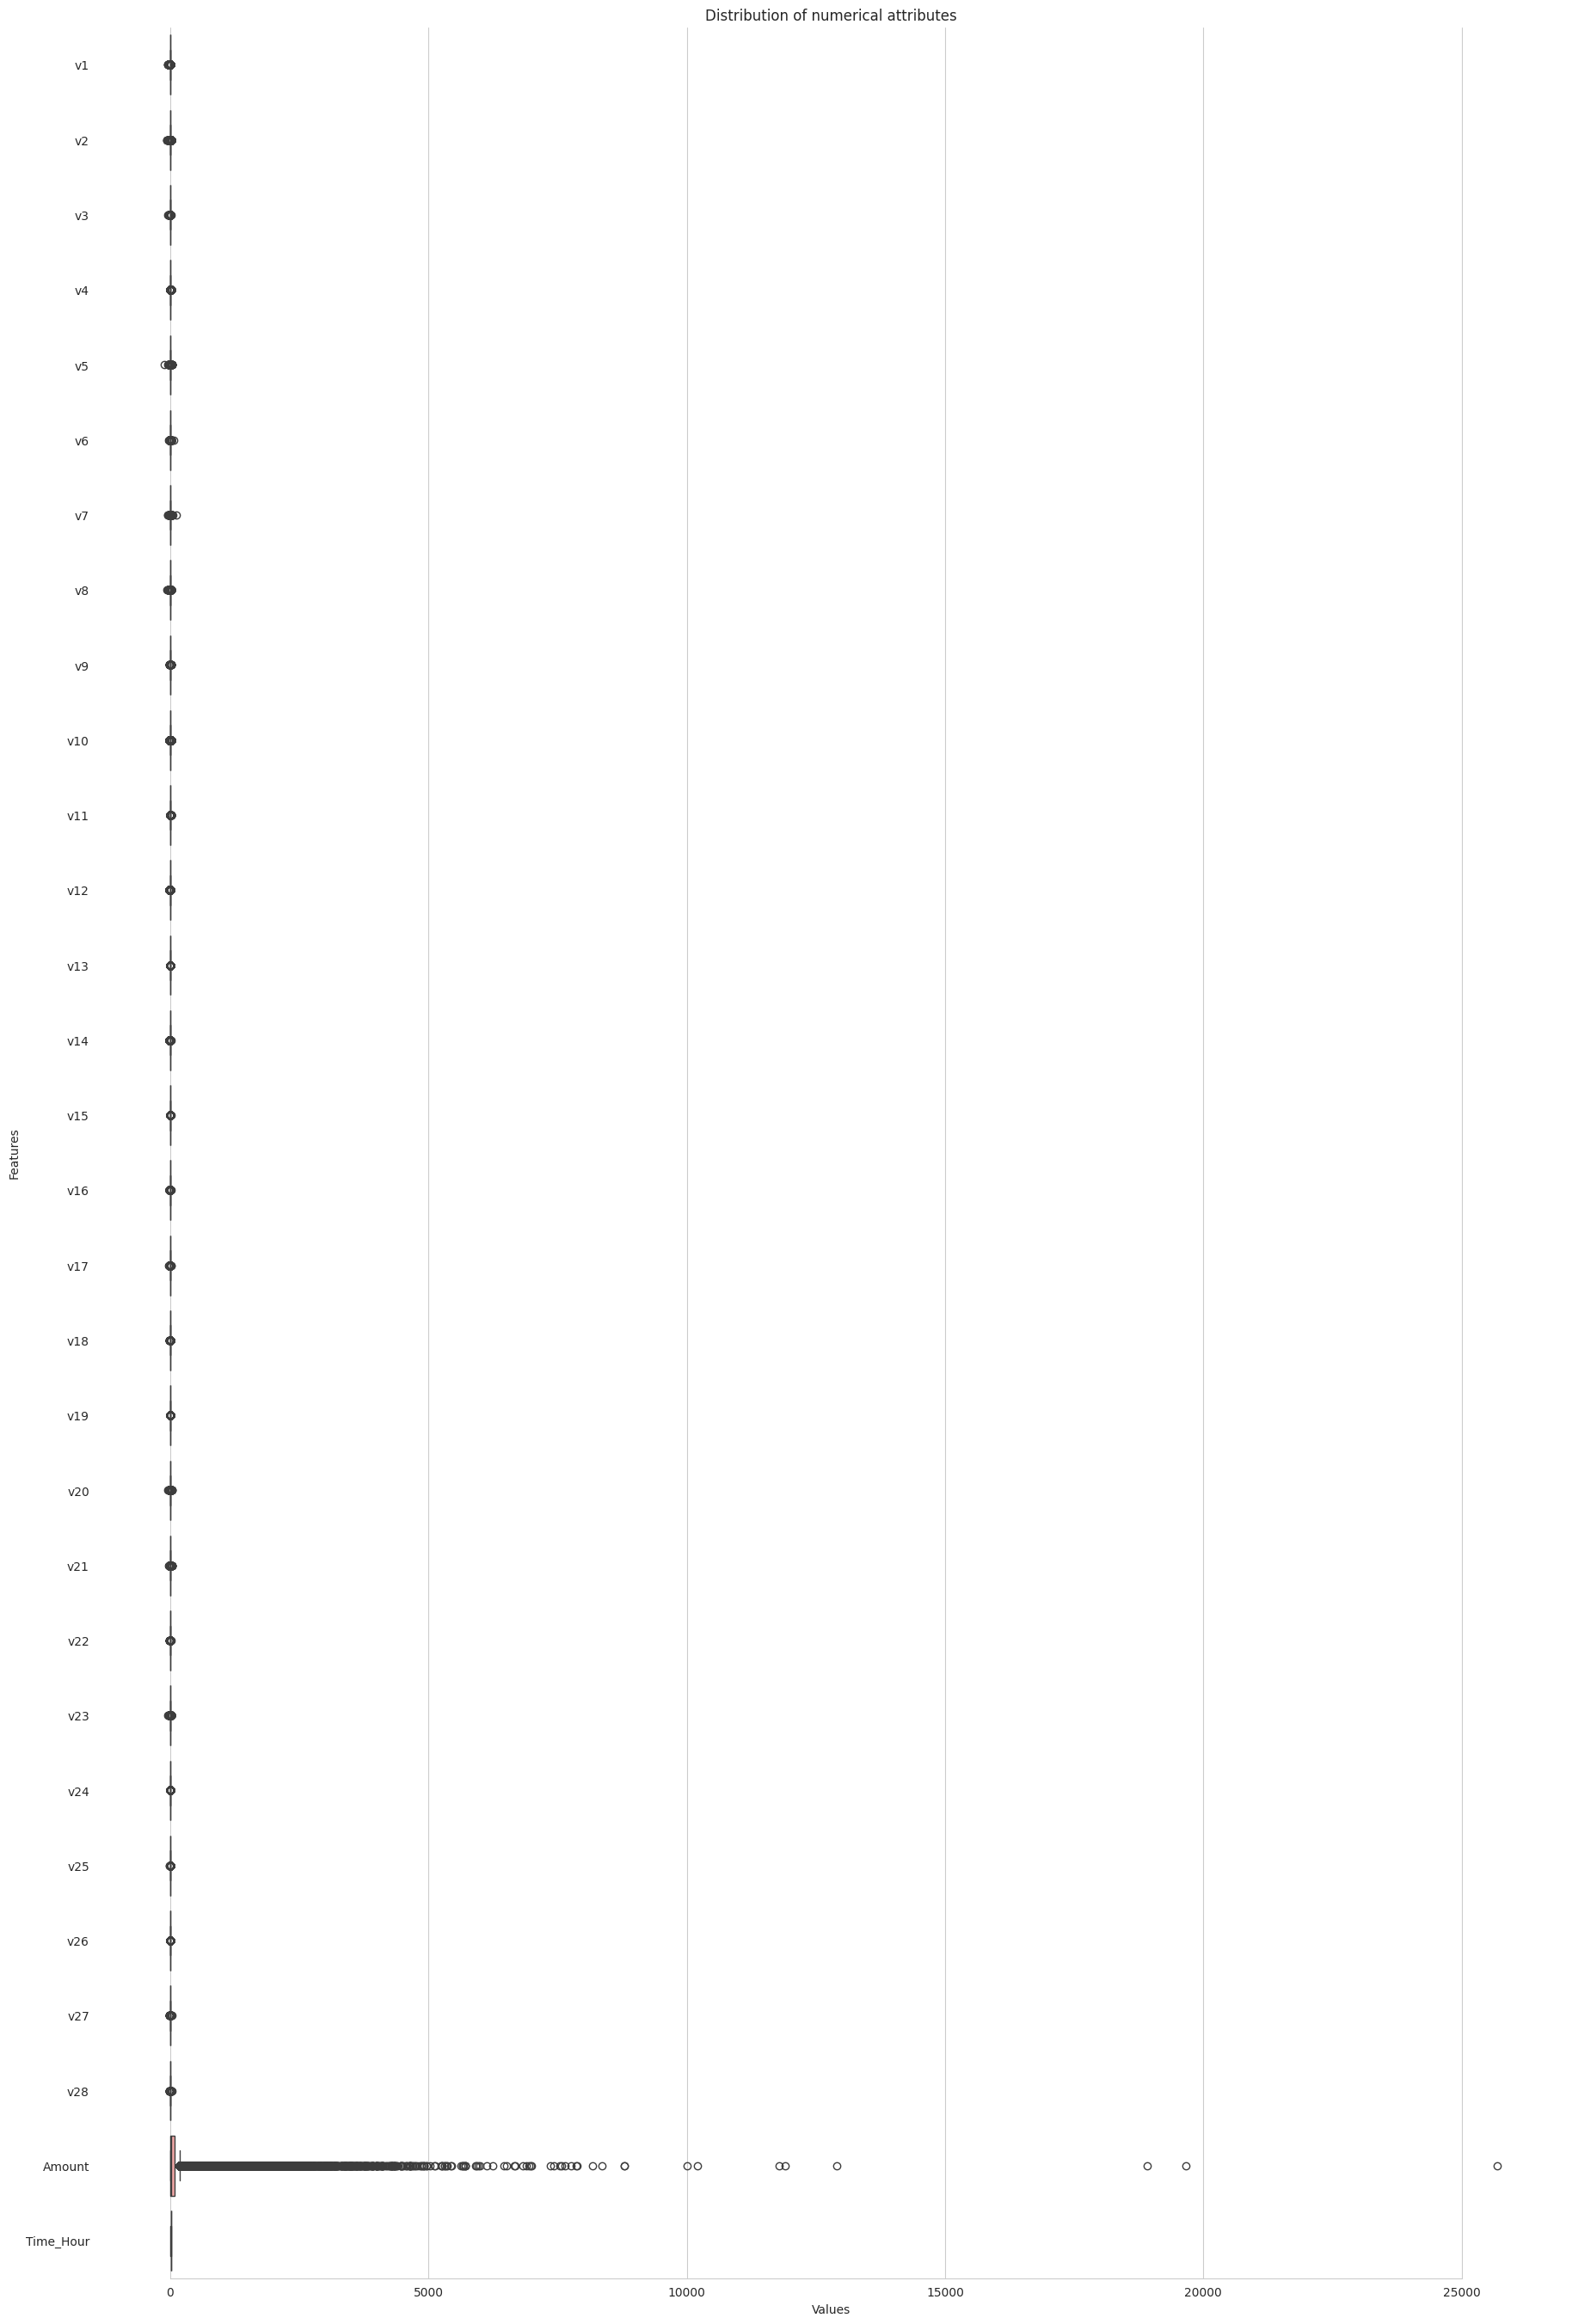

In [91]:

numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
li_not_plot = ['Class', 'Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22, 34))
ax = sns.boxplot(data=data[li_transform_num_feats], orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical attributes")
sns.despine(trim=True, left=True)

Diagram kotak menunjukkan keberadaan outlier pada beberapa fitur numerik. Hal ini menunjukkan perlunya penanganan outlier ini secara cermat selama pelatihan model.

## Fase Data Cleaning

#### Menghilangkan Fitur yang Tidak Diperlukan

In [92]:
# Drop unnecessary columns
data.drop('Time', axis=1, inplace=True)
data.drop(['Time_Day', 'Time_Min'], axis=1, inplace=True)

KeyError: "['Time'] not found in axis"

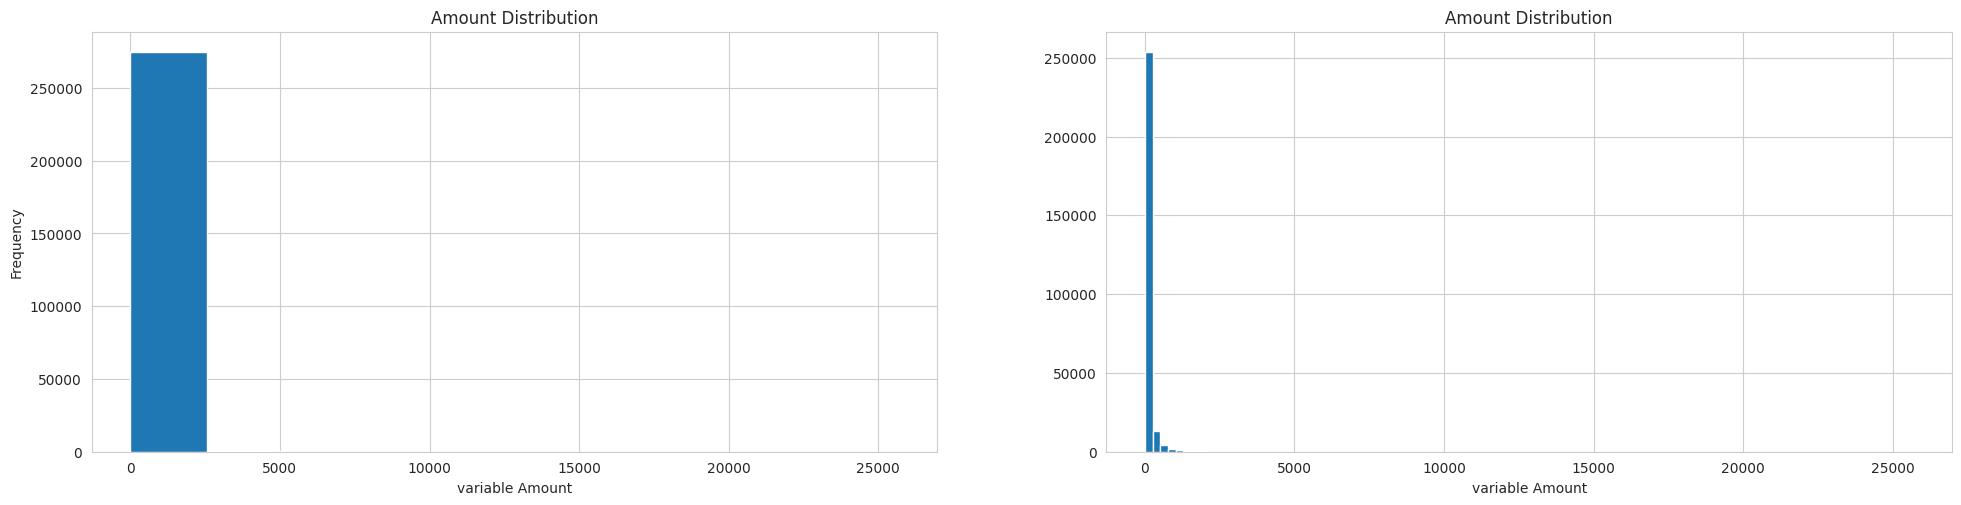

In [93]:
# Amount distribution
plt.figure(figsize=(24, 12))

plt.subplot(2, 2, 1)
plt.title('Amount Distribution')
data['Amount'].astype(int).plot.hist()
plt.xlabel("variable Amount")

plt.subplot(2, 2, 2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(data['Amount'], bins=100)
plt.show()

#### Menghilangkan Duplikasi Data

In [94]:
data = data.drop_duplicates()

### Penskalaan fitur
Penskalaan fitur diterapkan pada fitur 'Jumlah'. Tidak ada rekayasa fitur tambahan yang dilakukan karena kumpulan data tersebut terdiri dari fitur-fitur anonim.

In [95]:
# Scale 'Amount' feature
scaler_amount = StandardScaler()
data['Amount'] = scaler_amount.fit_transform(pd.DataFrame(data['Amount']))

/tmp/ipykernel_1136357/296446732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amount'] = scaler_amount.fit_transform(pd.DataFrame(data['Amount']))


## Menangani Imbalance Data

### Membuat fungsi untuk Menyeimbangkan data dengan undersampling

In [96]:

def undersample_data(data):
    majority_class = data[data.Class == 0]
    minority_class = data[data.Class == 1]
    majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
    balanced_data = pd.concat([majority_downsampled, minority_class])
    X = balanced_data.drop('Class', axis=1)
    y = balanced_data['Class']
    return X, y

In [97]:
# Membuat Fungsi Untuk Menyeimbangkan data dengan undersampling
def oversample_data(X, y):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res

In [98]:
# Mengolah data dengan undersampling
X_res_undersample, y_res_undersample = undersample_data(data)
# Process data for oversampling
X = data.drop('Class', axis=1)
y = data['Class']
X_res_oversample, y_res_oversample = oversample_data(X, y)

/tmp/ipykernel_1136357/3347155835.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col][normal_records], color='green')
/tmp/ipykernel_1136357/3347155835.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col][fraud_records], color='red')
/tmp/ipykernel_1136357/3347155835.py:9: UserWarn

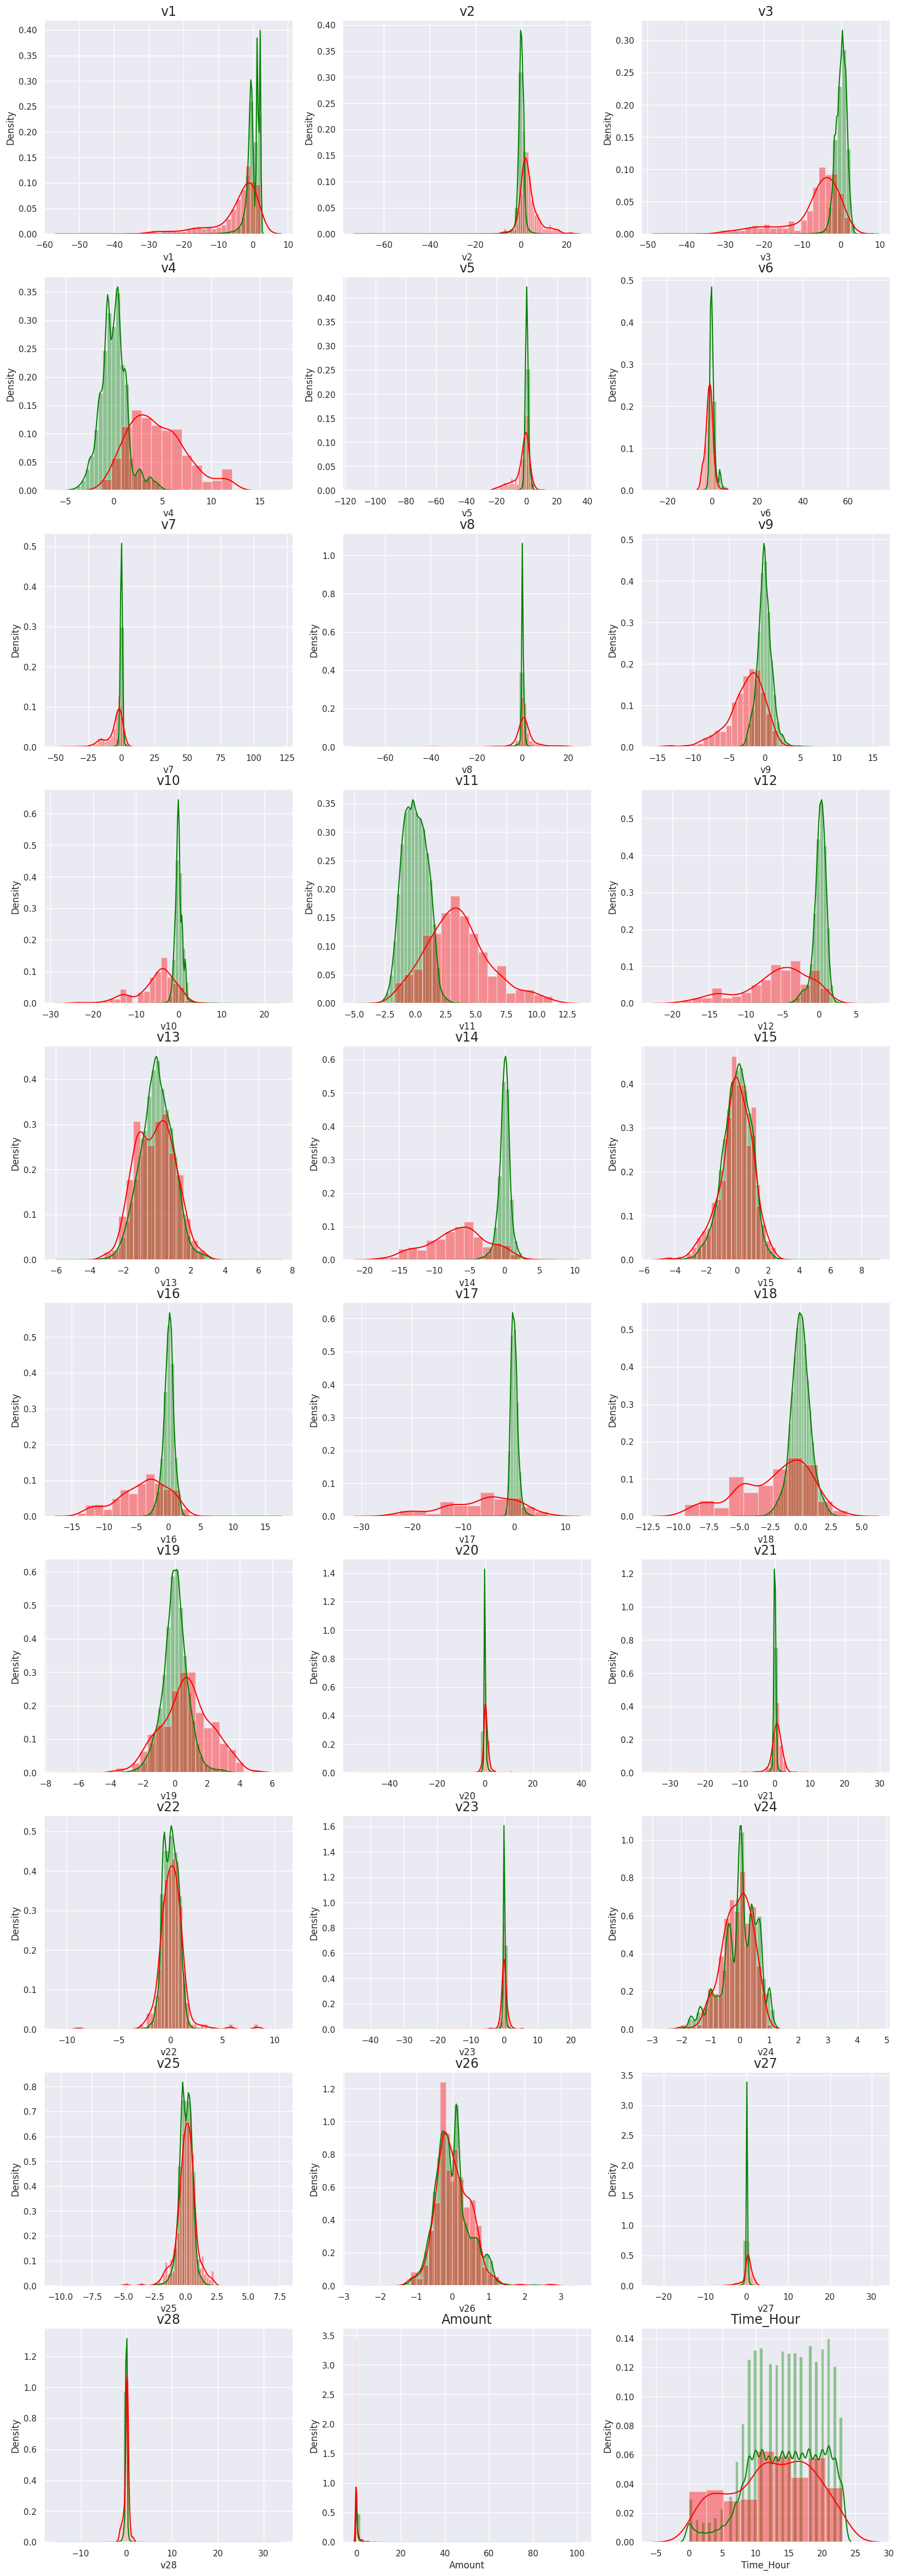

In [99]:
# VIsualisasi distribusi (sebaran) dan bentuk kemiringan (skewness)
cols = list(X.columns.values)
normal_records = data.Class == 0
fraud_records = data.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10, 3, n + 1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Pembagian Data Latih

In [100]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_res_undersample, y_res_undersample, test_size=0.2, random_state=42, stratify=y_res_undersample)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_res_oversample, y_res_oversample, test_size=0.2, random_state=42, stratify=y_res_oversample)

In [101]:
# Create a dictionary with the data to save
data_dict = {
    'X_train_under': X_train_under,
    'X_test_under': X_test_under,
    'y_train_under': y_train_under,
    'y_test_under': y_test_under,
    'X_train_over': X_train_over,
    'X_test_over': X_test_over,
    'y_train_over': y_train_over,
    'y_test_over': y_test_over
}